<h1><center>MIS 6382 Fall 2021 Homework Four</center></h1>

### Group members
* Yashaswini Shivanna
* Kushal Asrani

This assignment is worth __9%__ of the course grade and is due by __11:00 pm of 11/28/2021__.


<h3>Submission instructions</h3>
   
   1.	Submit a single notebook containing all class definitions together with the driver code.
 
   2.	You must also submit the data file (empdata.dat) with the records containing all data for the employees given in the test data file.  You must execute your program and enter data for all the employees listed in the test data file.  The resultant `empdata.dat` will therefore contain all the data I have provided as test data.  This will enable the TA to more easily grade your homework.
 
   3. You will automatically lose `40%` of the grade if your program does not compile.

__*The following guidelines should be followed and will be used to grade your homework:*__ 
-  Write code as directed below.
-  This is an individual homework assignment; no group submissions will be accepted. Any evidence of cheating will result in severe penalties being imposed.
-  Sample runs shown in the question should be used as a guide for implementation. However extensive testing needs to be done on your code to deal with all test cases that might possibly be executed.
-  The screen shots below show how your program should function with correct input. Screenshots for handling incorrect input are not shown. However, your code should use exception handling to validate user input.
-  Any code with syntax errors will be awarded zero points.
-  Rename your .ipynb file by adding the first two letters of your firstname followed by the first two letters of your last name and submit the file as your response for this assignment.



### Refer to the `MISFall2021-LibraryBookApp` notebook for help with this assignment

 
    
I.	In this assignment you will create an `Employee Database Application` by fulfilling the requirements given below.  You must first create the classes as described.  Then write a driver program that will use these classes to build an application for an `Employee Database`.  All employee data is stored in a file called `empdata.dat`.
    
II.	Each time you run the program, the user is allowed to repeatedly select from the five choices described below:
    1.	Add a new employee
    2.	Print all employee data for all the employees in the file
    3.	Compute and print the employee name and compensation of all employees
    4.	Print the employee name with vehicle information vehicles with mileage greater than 78000 miles
    5.	Exit the application 
    
III.	The first time you execute the program, your file will have no employees in it. Second time onwards, all employee data from previous executions of the program, should be available


<h3>Employee Application</h3>

-	Create a base class `Employee` that has the following attributes:
    -   Employee’s name (String)
    -   Employee’s address (String)
    -   Vehicle data (Vehicle). 
    
-	The child classes `FullTimeEmployee`, `HourlyEmployee` and `Consultant` that inherit from `Employee` have the following additional properties 
    -   FullTimeEmployee –            _salary_ (double)
    -   HourlyEmployee -              _hoursWorked_ (int) and _hourlyRate_ (double). 
    -   Consultant – _hoursWorked_ (int) and _ProjectType_ (valid values are 1, 2, and 3). 
 
-    All these classes have the __init__ method as well as the get and set methods.  In addition, they have additional methods required to complete the application as described below. 

__Compensation for each employee type is to be computed as follows:__
     
__FullTimeEmployee__:  Compensation is salary minus taxes. Taxes are calculated based on the tax rate in the table below:

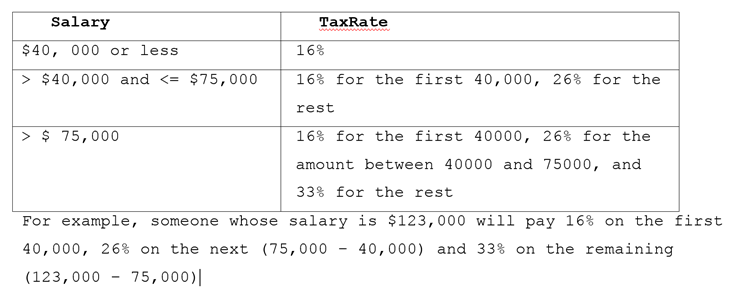

__HourlyEmployee__:  Compensation is `hoursWorked` times `hourlyRate` for the first 40 hours.  For hours in excess of 40 hours the hourly rate is 1.7 times the regular hourly rate.  For example, someone whose `hourlyRate` is 14.50 and who has worked 51 hours will earn `40 * 14.5 + 11 * 14.5 * 1.7`

__Consultant__:  Compensation is `hourlyRate` times the hours worked. `HourlyRate` for Consultants is computed based on the `ProjectType` as given in the table below:
    
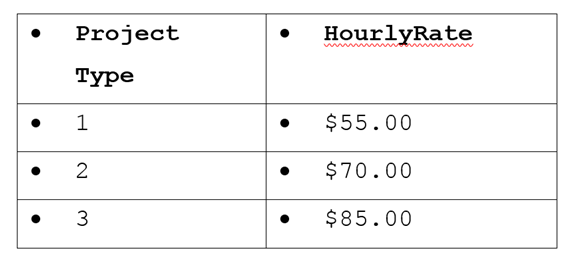

The`Vehicle` class has four instance variables – make, model, year of manufacture and mileage.  It should have a constructor (\_\_init\_\_ method ) which accepts values for all of the instance variables.  You may use aggregation or composition to include a Vehicle object to your Employee data. 

__Once the fives classes, _Employee, FullTimeEmployee, Consultant, PartTimeEmployee_ and _Vehicle_ have all been defined and tested per the requirements stated above, write a driver program to do the following:__
1.	Accept input for new Employees
2.	Display employee information (including vehicle information) for all the employees that are there in the system. 
3.	List the name of the Employees along with the compensation received by each.
4.	Display the employee name together with the make, model and mileage of all vehicles whose mileage is greater than 78000 miles. 
5.	Exit the system after writing all information to a file.

The program must repeatedly display the above options and allow the user to select one of them until she chooses option 5.  The program must save all data to a file and then exit the system once the user selects option 5.

__Note:__ Any employee data from earlier executions of the application must be available in subsequent executions.

__Additional Requirements:__
-  Your program should use exception handling to validate user input for the following variables:
-  Numeric values for year of manufacture, mileage, salary, hours worked and hourly rate. 
-  The only acceptable values for project type are 1, 2 or 3.
-  If the user enters invalid values for any of the variables above, print an appropriate message and ask the user to re-enter a valid value.
-  Your program should also ensure that the user enters valid values for the menu options as well as the choice of employee type.  If the user enters incorrect options for either the menu option or the pet type, your program should display an appropriate message and display the menu or the choice of employee types again.


In [ ]:
import json
from os.path import exists

class Vehicle:
    def __init__(self:"Vehicle", _make:str, _model:str, _year:int, _mile:int):
        self.make = _make
        self.model = _model
        self.year = _year
        self.mile = _mile

    
    def __repr__(self) -> str:
        return "Vehicle(make:{}, model:{}, year:{}, mileage:{})".format(self.make, self.model, self.year, self.mile)

class Employee(Vehicle):
    def __init__(self:"Employee", _name:str, _addr:str, _make:str, _model:str, _year:int, _mile:int, _etyp:str="Employee"):
        self.etyp = _etyp
        self.name = _name
        self.addr = _addr
        super().__init__(_make,_model,_year,_mile)
        
    def __repr__(self:"Employee") -> str:
        return "Employee(name:{}, addr:{}, {})".format(self.name, self.addr, super().__repr__())
    
class FullTimeEmployee(Employee):
    def __init__(self:"FullTimeEmployee",_name:str, _addr:str, _make:str, _model:str, _year:int, _mile:int, _slry:float):
        super().__init__(_name, _addr, _make, _model, _year, _mile, FullTimeEmployee.__name__)
        self.slry = _slry
        self.slab = (0, 40000.0, 75000.0, None)
        self.taxr = (0.16, 0.26, 0.33)
        
    def get_taxes(self:"FullTimeEmployee") -> float:
        s = self.slry
        t = 0.0
        l = len(self.slab)-1
        while l > 0:
            if s > self.slab[l-1] and ((self.slab[l] is None) or (s <= self.slab[l])):
                t += (s - self.slab[l-1]) * self.taxr[l-1]
                s = self.slab[l-1]
                l -= 1
            else:
                l -= 1
        return t
    
    def get_compensation(self:"FullTimeEmployee") -> float:
        return self.slry - self.get_taxes()
        
    def __repr__(self) -> str:
        return "FullTimeEmployee(salary:{}, {})".format(self.slry,super().__repr__())

class HourlyEmployee(Employee):
    def __init__(self:"HourlyEmployee",_name:str, _addr:str, _make:str, _model:str, _year:int, _mile:int, _hrsw:int, _rate:int):
        super().__init__(_name, _addr, _make, _model, _year, _mile, HourlyEmployee.__name__)
        self.hrsw = _hrsw
        self.rate = _rate
    
    def get_compensation(self:"HourlyEmployee", otrt:float=1.7, maxh:float=40) -> float:
        return (self.hrsw * self.rate * (self.hrsw <= maxh)) + ((maxh*self.rate + (self.hrsw - maxh) * self.rate * otrt) * (self.hrsw > maxh))
        
    def __repr__(self:"HourlyEmployee") -> str:
        return "HourlyEmployee({},{},{})".format(self.hrsw, self.rate, super().__repr__())
    
class Consultant(Employee):
    def __init__(self:"Consultant",_name:str, _addr:str, _make:str, _model:str, _year:int, _mile:int, _hrsw:int, _ptyp:int):
        super().__init__(_name, _addr, _make, _model, _year, _mile, Consultant.__name__)
        self.hrsw = _hrsw
        self.ptyp = _ptyp
        self.cost = (0, 55.0, 70.0, 85.0)
        
    def get_compensation(self:"Consultant") -> float:
        return self.hrsw * self.cost[self.ptyp]
        
    def __repr__(self:"Consultant") -> str:
        return "Consultant({},{},{})".format(self.hrsw, self.ptyp, super().__repr__())

  
class App:
    def __init__(self:"App"):
        self.init = True
        self.running = False
        self.employees = []
        self.dataexists = False
        self.dbfile = "empdata.dat"
        self.options = {
            # 0 invalid option
            0:[
              "Invalid option"
            ],
            # 1 main menu
            1:[
                "1. To add an employee",
                "2. To print the name and address of all employees",
                "3. To print the employee name and the compensation of all employees",
                "4. To print the employee name with vehicle information for high mileage vehicles",
                "5. To exit program",
                "Your selection: "
            ],
            # 2 adding an employee
            2:[
                "Type of Employee?(1-Full Time;2-Hourly;3-Consultant) : ",
                "Enter the employee's name: ",
                "Enter the employee's address: ",
                "Enter the vehicle make: ",
                "Enter the vehicle model: ",
                "Enter the year of manufacture: ",
                "Enter the mileage: ",
            ],
            # 3 adding a Full time employee
            3:[
              "Enter the salary: "
            ],
            # 4 adding a consultant
            4:[
              "Enter the hours worked: ",
              "Project type? (Enter a number between 1 and 3): "
            ],
            # 5 adding a part time employee (hourly)
            5:[
              "Enter the hours worked: ",
              "Enter the hourly rate: "
            ],
            # 6 display type of employee
            6:[
              "Details of this Full Time Employee are: ",
              "Details of Consultant are: ",
              "Details of Hourly Employee are: "
            ],
            # 7 display Employee
            7:[
              "Employee Name: ",
              "Employee Address: "
            ],
            # 8 display Vehicle
            8:[
              "Make: ",
              "Model: ",
              "Year of Manufacture: ",
              "Mileage: "
            ],
            # 9 display Full Time employee
            9:[
              "Salary: "
            ],
            # 10 display Consultant
            10:[
              "Hours Worked: ",
              "Project Type: "
            ],
            # 11 display Hourly employee
            11:[
              "Hours Worked: ",
              "Hourly Rate: "
            ],
            # 12 display employee name and compesnation for all
            12:[
              "Employee name and compensation of all Employees\n====================================="
            ],
            # 13 display employee name and high mileage vehicle 
            13:[
              "Employee name and Vehicle Data for High Mileage Vehicles\n==========================================================",
              "Employee name is: ",
            ],
            # 14 exiting
            14:[
              "You chose to exit the program",
              "Are you sure (Y/N)? ",
              "Exiting the program! Goodbye!"
            ],
            15:[
              "==== Menu ====",
              "No data found in database !"
            ]
        }

    def show_main_menu(self:"App"):
      print(self.options[15][0])
      for i in range(len(self.options[1])-1):
        print(self.options[1][i])

    def get_full_time_employee(self:"App") -> FullTimeEmployee:
      emp = FullTimeEmployee(
        input(self.options[2][1]),
        input(self.options[2][2]),
        input(self.options[2][3]),
        input(self.options[2][4]),
        int(input(self.options[2][5])),
        int(input(self.options[2][6])),
        float(input(self.options[3][0])),
      )
      return emp

    def get_consultant(self):
      emp = Consultant(
        input(self.options[2][1]),
        input(self.options[2][2]),
        input(self.options[2][3]),
        input(self.options[2][4]),
        int(input(self.options[2][5])),
        float(input(self.options[2][6])),
        int(input(self.options[4][0])),
        int(input(self.options[4][1]))
      )
      return emp

    def get_hourly_employee(self):
      emp = HourlyEmployee(
        input(self.options[2][1]),
        input(self.options[2][2]),
        input(self.options[2][3]),
        input(self.options[2][4]),
        int(input(self.options[2][5])),
        int(input(self.options[2][6])),
        int(input(self.options[5][0])),
        int(input(self.options[5][1]))
      )
      return emp

    def show_full_time_employee(self:"App", emp:"FullTimeEmployee"):
      print(self.options[6][0])
      print("{}{}; {}{}".format(self.options[7][0], emp.name, self.options[7][1], emp.addr))
      print("{}{}; {}{}; {}{}; {}{}".format(self.options[8][0], emp.make, self.options[8][1], emp.model, self.options[8][2], emp.year, self.options[8][3], emp.mile))
      print("{}{:.2f}".format(self.options[9][0], emp.slry))
      print()

    def show_consultant(self:"App", emp:"Consultant"):
      print(self.options[6][1])
      print("{}{}; {}{}".format(self.options[7][0], emp.name, self.options[7][1], emp.addr))
      print("{}{}; {}{}; {}{}; {}{}".format(self.options[8][0], emp.make, self.options[8][1], emp.model, self.options[8][2], emp.year, self.options[8][3], emp.mile))
      print("{}{}; {}{}".format(self.options[10][0], emp.hrsw, self.options[10][1], emp.ptyp))
      print()

    def show_hourly_employee(self:"App", emp:"HourlyEmployee"):
      print(self.options[6][2])
      print("{}{}; {}{}".format(self.options[7][0], emp.name, self.options[7][1], emp.addr))
      print("{}{}; {}{}; {}{}; {}{}".format(self.options[8][0], emp.make, self.options[8][1], emp.model, self.options[8][2], emp.year, self.options[8][3], emp.mile))
      print("{}{}; {}{}".format(self.options[11][0], emp.hrsw, self.options[11][1], emp.rate))
      print()

    def add_employee(self:"App"):
      t = int(input(self.options[2][0]))

      if type(t) != int or t<1  or t>3:
        raise ValueError 

      if t == 1:
        emp = self.get_full_time_employee()
        self.employees.append(emp)

      elif t == 2:
        emp = self.get_hourly_employee()
        self.employees.append(emp)

      elif t == 3:
        emp = self.get_consultant()
        self.employees.append(emp)
      

    def show_name_and_address(self:"App"):
      print()
      for e in self.employees:
        if type(e) == FullTimeEmployee:
          self.show_full_time_employee(e)
        elif type(e) == Consultant:
          self.show_consultant(e)
        elif type(e) == HourlyEmployee:
          self.show_hourly_employee(e)

    def show_name_and_compensation(self:"App"):
      print()
      print(self.options[12][0])
      for e in self.employees:
        print("{}'s is ${:.2f}".format(e.name, e.get_compensation()))
      print()

    def show_name_and_high_mileage(self:"App", limit:float):
      print()
      print(self.options[13][0])
      for e in self.employees:
        if e.mile > limit:
          print("{}{} {}{}; {}{}; {}{}; {}{}".format(self.options[13][1], e.name, self.options[8][0], e.make, self.options[8][1], e.model, self.options[8][2], e.year, self.options[8][3], e.mile))
      print()
    
    def loaddata(self:"App", filename:str):
      jsondata = None
      with open(filename, "r") as f:
        jsondata = json.load(f)
      
      if len(jsondata) > 0:
        for e in jsondata:
          if e["etyp"] == "FullTimeEmployee":
            emp = FullTimeEmployee(
              e["name"],
              e["addr"],
              e["make"],
              e["model"],
              e["year"],
              e["mile"],
              e["slry"]
            )
            self.employees.append(emp)

          elif e["etyp"] == "HourlyEmployee":
            emp = HourlyEmployee(
              e["name"],
              e["addr"],
              e["make"],
              e["model"],
              e["year"],
              e["mile"],
              e["hrsw"],
              e["rate"]
            )
            self.employees.append(emp)

          elif e["etyp"] == "Consultant":
            emp = Consultant(
              e["name"],
              e["addr"],
              e["make"],
              e["model"],
              e["year"],
              e["mile"],
              e["hrsw"],
              e["ptyp"]
            )
            self.employees.append(emp)


    def savedata(self:"App", filename:str):
      jsonlist = []
      for e in self.employees:
        x = e.__dict__
        x.pop('slab',None)
        x.pop('taxr',None)
        x.pop('cost',None)
        jsonlist.append(x)
      
      with open(filename, "w+") as f:
        json.dump(jsonlist,f,indent=4)


    def exitapp(self):
      print(self.options[14][0])
      yn = input(self.options[14][1])
      if yn.lower() == "y":
        print(self.options[14][2])
        self.init = False
        self.running = False
      elif yn.lower() == "n":
        return
      else:
        raise ValueError

    def run(self):
        if self.init and not self.running:
          if exists(self.dbfile):
            self.loaddata(self.dbfile)
            self.dataexists = True
          self.running = True

          while self.running:
            try:
              self.show_main_menu()

              opt = int(input(self.options[1][5]))
              if type(opt) != int or opt<1 or opt>5:
                raise ValueError

              if opt == 1:
                self.add_employee()
                self.dataexists = True

              elif opt == 2:
                if self.dataexists:
                  self.show_name_and_address()
                else:
                  print(self.options[15][1])

              elif opt == 3:
                if self.dataexists:
                  self.show_name_and_compensation()
                else:
                  print(self.options[15][1])
                
              elif opt == 4:
                if self.dataexists:
                  self.show_name_and_high_mileage(78000)
                else:
                  print(self.options[15][1])

              elif opt == 5:
                self.savedata(self.dbfile)
                self.exitapp()

            except ValueError as e:
              print(self.options[0][0])

            except Exception as e:
              print("Exception : ", e)

if __name__ == "__main__":
  App().run()

==== Menu ====
1. To add an employee
2. To print the name and address of all employees
3. To print the employee name and the compensation of all employees
4. To print the employee name with vehicle information for high mileage vehicles
5. To exit program
Your selection: 1
Type of Employee?(1-Full Time;2-Hourly;3-Consultant) : 2
Enter the employee's name: Abhishek
Enter the employee's address: Randikhaana
Enter the vehicle make: 2002
Enter the vehicle model: i10
Enter the year of manufacture: 2001
Enter the mileage: 50
Enter the hours worked: 40
Enter the hourly rate: 10
==== Menu ====
1. To add an employee
2. To print the name and address of all employees
3. To print the employee name and the compensation of all employees
4. To print the employee name with vehicle information for high mileage vehicles
5. To exit program
Your selection: 3

Employee name and compensation of all Employees
Amy's is $66535.00
Cathy's is $46920.00
Bill's is $23520.00
Tom's is $227000.00
Timothy's is $1406.50

The screen shots below show how your program should function with correct input.  Screenshots for handling incorrect input are not shown. However, as described earlier, your code should use exception handling to validate user input

<h3>Screenshot For Adding a Full Time Employee or a Consultant</h3>

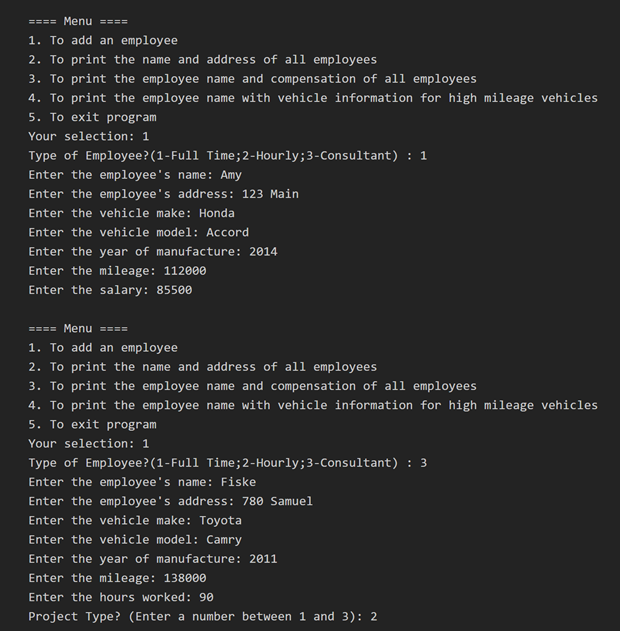

<h3>Screenshot For Adding a Part Time Employee</h3>

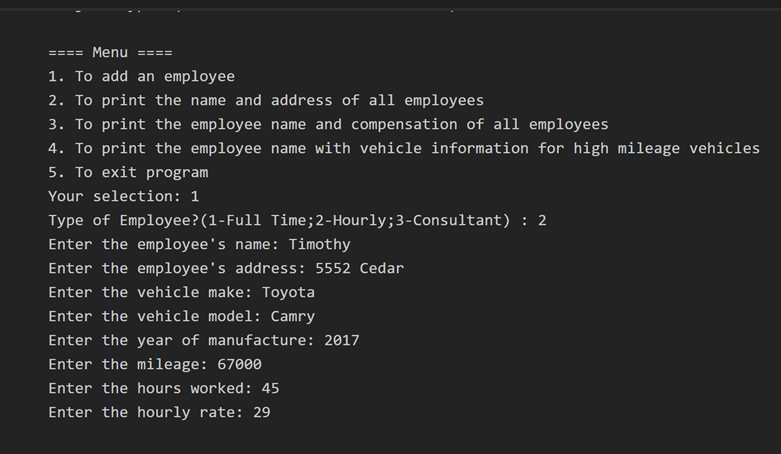

<h3>Screenshot For Displaying Employee Information </h3>

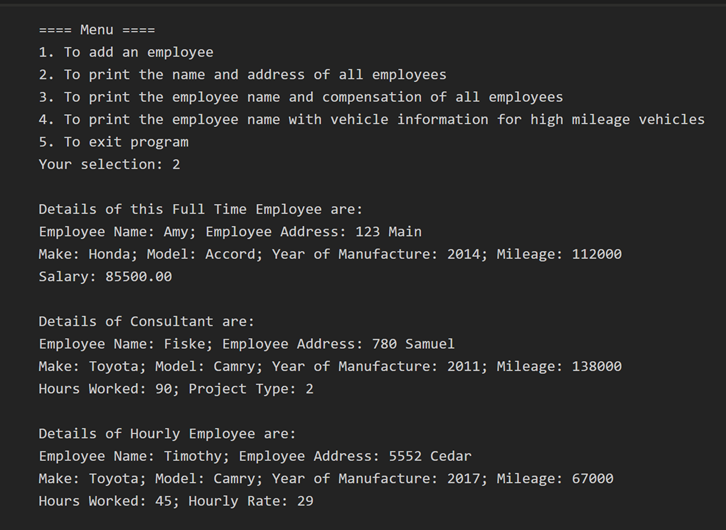

<h3>Screenshot Displaying Results of Option 3 and Option 4</h3>

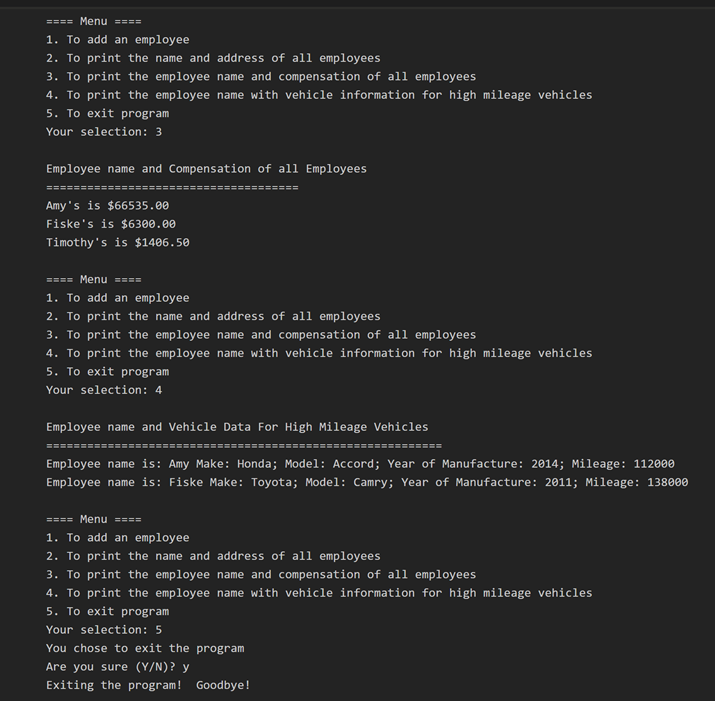